<a href="https://colab.research.google.com/github/Smita-Pr/Using_Transformers_NLP_Tasks/blob/main/Implementing_Pipeline_UsingTransformers_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets evaluate transformers[sentencepiece]

In [2]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

## Implementing The Transformer library Pipeline Function

The transformer models can't understand text directly , tokenizers convert the text inputs to a numerical representation of the text which then is further processed to complete NLP tasks.

The tokenizer does the following steps :
*   Split the input text into words,subwords,symbols etc called tokens
*   map each token to an integer value
*   Add info/inputs useful for model

the preprocessing has to match the model pretraining step for which we use pretrained function

In [3]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


In [4]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="tf")
print(inputs)

{'input_ids': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662,
        12172,  2607,  2026,  2878,  2166,  1012,   102],
       [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,
            0,     0,     0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>}


### Understanding and using the model
 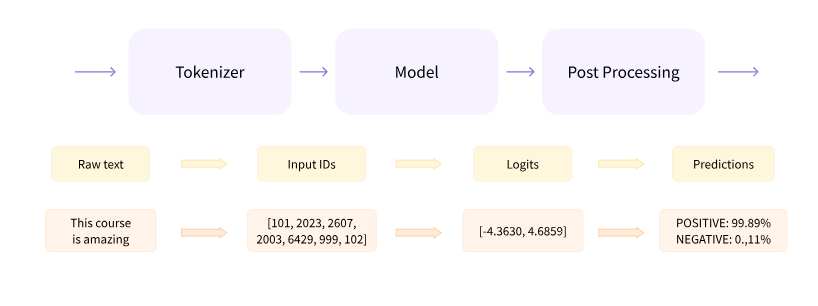

In [5]:
from transformers import TFAutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = TFAutoModel.from_pretrained(checkpoint)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'classifier.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [6]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

#[ Batch size ( no. of sequences processed),
# sequence_length (length of numerical representation of sequence ),
# hidden_size (vector dimension of each model input tensor) ]

(2, 16, 768)


In [7]:
from transformers import TFAutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(inputs)


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [8]:
print(outputs.logits.shape)

(2, 2)


In [9]:
print(outputs.logits)

tf.Tensor(
[[-1.5606974  1.6122824]
 [ 4.169232  -3.3464477]], shape=(2, 2), dtype=float32)


### Postprocessing the output

logits (raw unnormalized scores outputted by last layer of the model)  are converted to probabilities using softmax layer

In [13]:
import tensorflow as tf

predictions = tf.math.softmax(outputs.logits, axis=-1)
print(predictions)

tf.Tensor(
[[4.0195297e-02 9.5980471e-01]
 [9.9945587e-01 5.4418371e-04]], shape=(2, 2), dtype=float32)


In [10]:
model.config.id2label

# [Negative : 0.04195, Positive : 0.9598]
# [Negative : 0.99945, Postive  : 0.0005441]

{0: 'NEGATIVE', 1: 'POSITIVE'}